In [30]:
%matplotlib inline
import matplotlib.pylab as plt
import lsst.sims.skybrightness as sb
import numpy as np
import SkyModelPre as sbp
import healpy as hp
import lsst.sims.utils as utils
import timeit

In [2]:
nside = 32
hpindx = np.arange(hp.nside2npix(nside))
ra, dec = utils._hpid2RaDec(nside, hpindx)

classic_model = sb.SkyModel(mags=True)

In [3]:
new_model = sbp.SkyModelPre('generated_sky.npz', data_path="")

In [4]:
def callClassic(sm, ra, dec, mjds):
    for mjd in mjds:
        sm.setRaDecMjd(ra, dec, mjd)
        mags = sm.returnMags()

In [5]:
def callNew(sm, mjds):
    for mjd in mjds:
        mags = sm.full_sky(mjd)

In [6]:
step = 2. /60. / 24.  # 2 minute timestep
mjds = np.arange(200)*step + 59560.2+0.1

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+1/lib/python/healpy-1.8.1-py2.7-macosx-10.6-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+1/lib/python/healpy-1.8.1-py2.7-macosx-10.6-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/numpy/ma/core.py:2255: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+1/lib/python/healpy-1.8.1-py2.7-macosx-10.6-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+1/lib/python/healpy-1.8.1-py2.7-macos

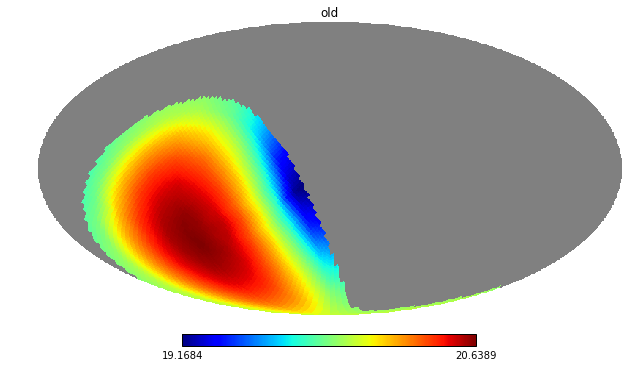

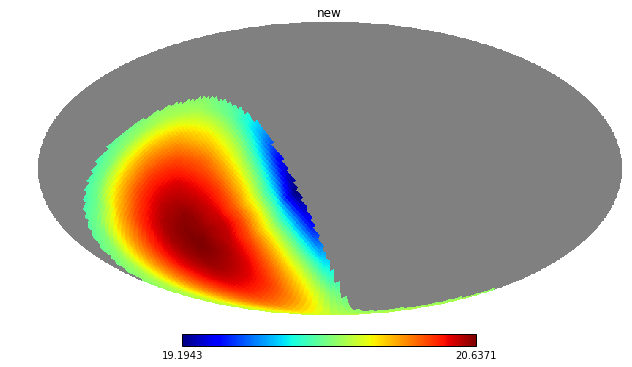

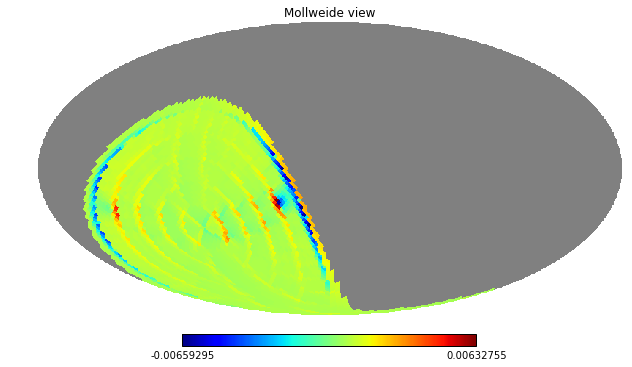

In [7]:
# Check that the results from the 2 look similar
# mjd = mjds[100]
mjd = new_model.info['mjds'][1]+.001
classic_model.setRaDecMjd(ra, dec, mjd)
mags1 = classic_model.returnMags()
hp.mollview(mags1['r'], title='old')
mags2 = new_model.full_sky(mjd)
hp.mollview(mags2['r'], title='new')
diff = mags1['r'] - mags2['r']
diff[np.where( (mags1 == hp.UNSEEN) | (mags2 == hp.UNSEEN))] = hp.UNSEEN
hp.mollview(diff)

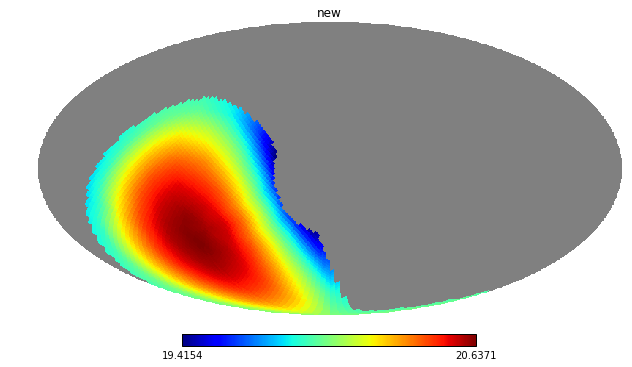

In [8]:
# Check that the mask makes sense
new_model.info['masks'][0]
mags2['r'][np.where(new_model.info['masks'][0])] = hp.UNSEEN
hp.mollview(mags2['r'], title='new')

In [9]:
time1 = timeit.timeit("callClassic(classic_model,ra ,dec, mjds)", number=1, 
                     setup="from __main__ import callClassic, classic_model,ra,dec,mjds")
print 'Classic model time = %f' % time1

Classic model time = 30.538596


In [10]:
time = timeit.timeit("callNew(new_model, mjds)", number=1, 
                     setup="from __main__ import callNew, new_model, mjds")
print 'New model time = %f' % time

New model time = 0.027728


In [11]:
print "speedup factor = %f" % (time1/time)

speedup factor = 1101.369358


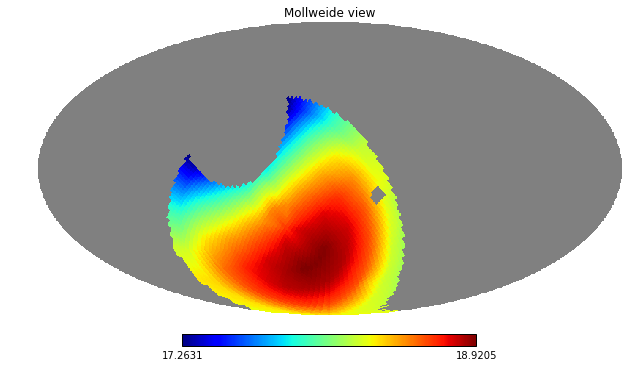

In [33]:
i = 122
newmap = new_model.sb['r'][i,:].copy()
newmap[np.where(new_model.info['masks'][i] == True)] = hp.UNSEEN
hp.mollview(newmap)

In [19]:
new_model.info['mjds'][119:125]

array([ 59564.34583333,  59564.35625   ,  59565.02986111,  59565.04027777,
        59565.05416666,  59565.06805555])

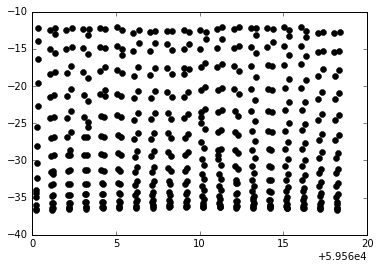

In [32]:
plt.plot(new_model.info['mjds'], np.degrees(new_model.info['sunAlts']), 'ko')